In [1]:
import pandas as pd
import json
import calendar
from datetime import datetime,date
import nltk
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("messages.json",encoding="utf-8") as f:
    data = json.load(f)


In [3]:
person_msg_dict = {}
msg_person_dict = {}

In [4]:
for i in data['messages']:
    if i['type'] == 'message':
        person = i['from']
        if person == None:
            person = "Null user"
        if person not in person_msg_dict:
            person_msg_dict[person] = []
        person_msg_dict[person].append(i['id'])
        msg_person_dict[i['id']] = person

In [5]:
def insert_into_df(dataframe,valueList):
    dataframe.loc[-1] = valueList
    dataframe.index = dataframe.index + 1
    dataframe = dataframe.sort_index()

In [6]:
df = pd.DataFrame(columns=['msg_id','from','to'])
for i in data['messages']:
    if i['type'] == 'message':
        to = 'broadcast'
        if 'reply_to_message_id' in i:
            try:
                to = msg_person_dict[i['reply_to_message_id']]
            except KeyError:
                to = 'Message not in messages.json'
        valueList = [i['id'], msg_person_dict[i['id']], to]
        insert_into_df(df,valueList)
        

In [7]:
missing_values = df.isnull()


rows_with_missing_values = df[missing_values.any(axis=1)]

print(rows_with_missing_values)

Empty DataFrame
Columns: [msg_id, from, to]
Index: []


C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129411 (\N{TURKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127796 (\N{PALM TREE}) missing from current font.
  fig.canvas.print

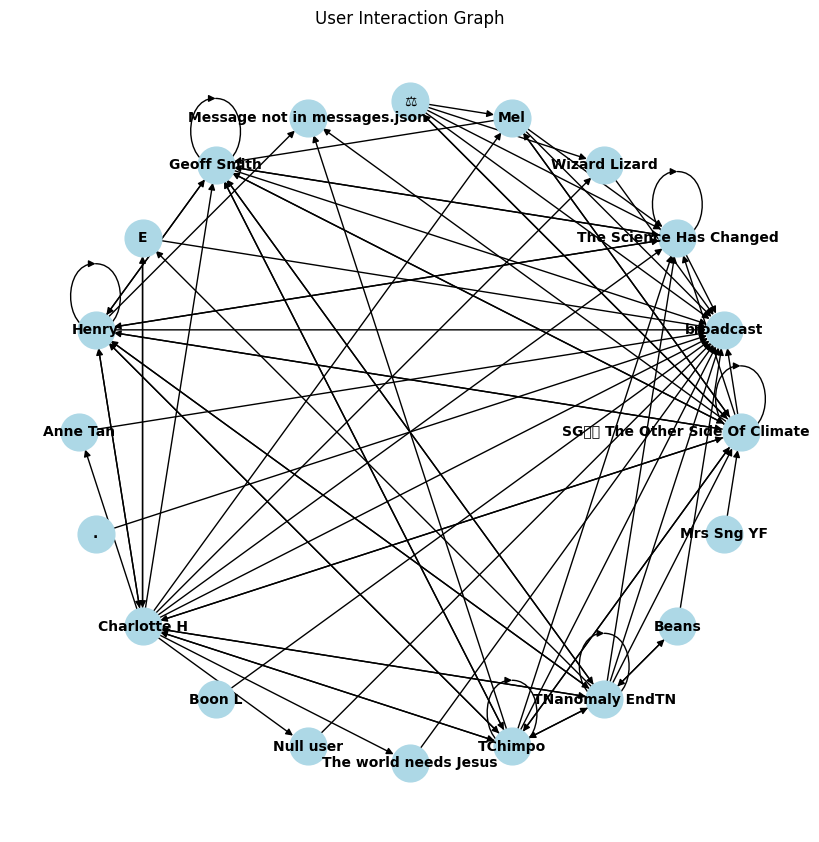

In [8]:
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red')
plt.title("User Interaction Graph")
plt.show()

** 'Null user' here refers to user that are listed as null in the messages.json 

**Broadcast here refers to messages not directed at anyone

** 'Message not found in messages.json' refers to messages referred to, but not listed in messages.json

In [9]:
G2 = nx.DiGraph()

for _, row in df.iterrows():
    if G2.has_edge(row['from'], row['to']):
        # If the edge exists, increase the weight by 1
        G2[row['from']][row['to']]['weight'] += 1
    else:
        # Otherwise, add a new edge with weight 1
        G2.add_edge(row['from'], row['to'], weight=1)

In [11]:
edges_with_weights = [(u, v, weight) for (u, v, weight) in G2.edges(data='weight')]

sorted_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)
print("MOST FREQUENT INTERACTIONS:")
print("-" * 100)
for (u, v, weight) in sorted_edges:
    print(f"Interactions from {u} to {v}: {weight}")

MOST FREQUENT INTERACTIONS:
----------------------------------------------------------------------------------------------------
Interactions from SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏 to broadcast: 994
Interactions from TNanomaly EndTN to broadcast: 370
Interactions from The Science Has Changed to broadcast: 241
Interactions from Henry to broadcast: 160
Interactions from Geoff Smith to broadcast: 62
Interactions from Wizard Lizard to broadcast: 49
Interactions from Mel to broadcast: 35
Interactions from Charlotte H to SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏: 28
Interactions from The world needs Jesus to broadcast: 27
Interactions from SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏 to SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏: 26
Interactions from TNanomaly EndTN to Henry: 21
Interactions from Anne Tan to broadcast: 20
Interactions from TChimpo to Henry: 16
Interactions from Charlotte H to TNanomaly EndTN: 15
Interactions from TChimpo to broadcast: 12
Interactions from ⚖ to SG